In [84]:
import csv
import numpy as np
import pandas as pd
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
# from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
# from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt


In [92]:
def fixDataset(csvName, params, title):

    ids_1, ids_2, ids_3, labels = params
    print(labels)
    with open(csvName, 'r') as f:
        reader = csv.reader(f)
        text_file = open(title, "w")
        for row in reader:
            for row_i in range(len(row)):
                text = ""
                if row_i == 1:
                    if row[row_i] in ids_1:
                        text = str(ids_1[row[row_i]])
                    else:
                        ids_1[row[row_i]] = ids_1["count"] 
                        ids_1["count"] += 1
                        text = str(ids_1[row[row_i]])

                elif row_i == 2:
                    if row[row_i] in ids_2:
                        text = str(ids_2[row[row_i]])
                    else:
                        ids_2[row[row_i]] = ids_2["count"] 
                        ids_2["count"] += 1
                        text = str(ids_2[row[row_i]])
                elif row_i == 3:
                    if row[row_i] in ids_3:
                        text = str(ids_3[row[row_i]])
                    else:
                        ids_3[row[row_i]] = ids_3["count"] 
                        ids_3["count"] += 1
                        text = str(ids_3[row[row_i]])
                elif row_i == 41:
                    if row[row_i] in labels:
                        text = str(labels[row[row_i]])
                    else:
                        labels[row[row_i]] = labels["count"] 
                        labels["count"] += 1
                        text = str(labels[row[row_i]])
                else:
                    text = row[row_i]

                text_file.write("{},".format(text))
            text_file.write('\n')

    return [ids_1,ids_2,ids_3,labels]

In [93]:
labels = {"count":0}
ids_1 = {"count":0}
ids_2 = {"count":0}
ids_3 = {"count":0}
ids_1, ids_2, ids_3, labels = fixDataset("kddtrain.csv", [ids_1, ids_2, ids_3, labels], "kddtrain-mod2.csv")
ids_1, ids_2, ids_3, labels = fixDataset("kddtrain-20.csv", [ids_1, ids_2, ids_3, labels], "kddtrain-20-mod2.csv" )
ids_1, ids_2, ids_3, labels = fixDataset("kddtest.csv", [ids_1, ids_2, ids_3, labels], "kddtest-mod2.csv" )

{'count': 0}
{'count': 23, 'normal': 0, 'neptune': 1, 'warezclient': 2, 'ipsweep': 3, 'portsweep': 4, 'teardrop': 5, 'nmap': 6, 'satan': 7, 'smurf': 8, 'pod': 9, 'back': 10, 'guess_passwd': 11, 'ftp_write': 12, 'multihop': 13, 'rootkit': 14, 'buffer_overflow': 15, 'imap': 16, 'warezmaster': 17, 'phf': 18, 'land': 19, 'loadmodule': 20, 'spy': 21, 'perl': 22}
{'count': 23, 'normal': 0, 'neptune': 1, 'warezclient': 2, 'ipsweep': 3, 'portsweep': 4, 'teardrop': 5, 'nmap': 6, 'satan': 7, 'smurf': 8, 'pod': 9, 'back': 10, 'guess_passwd': 11, 'ftp_write': 12, 'multihop': 13, 'rootkit': 14, 'buffer_overflow': 15, 'imap': 16, 'warezmaster': 17, 'phf': 18, 'land': 19, 'loadmodule': 20, 'spy': 21, 'perl': 22}


In [118]:

print("***************************************************************")

traindata = pd.read_csv('kddtrain-mod2.csv', header=None)
testdata = pd.read_csv('kddtest-mod2.csv', header=None)

X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:42]

scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)


traindata = np.array(trainX)
trainlabel = np.array(Y)

testdata = np.array(testT)
testlabel = np.array(C)


***************************************************************
22


In [106]:
print("***************************************************************")

model = LogisticRegression()
model.fit(traindata, trainlabel)


# make predictions
expected = testlabel
predicted = model.predict(testdata)


print("***************************************************************")

***************************************************************
***************************************************************


/Users/evanteters/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [107]:
print("***************************************************************")

# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)

cm = confusion_matrix(expected, predicted)
print(expected.shape)
print(predicted.shape)
expected = np.array(expected)
predicted = np.array(predicted)
# cm.print_stats()

np.savetxt('expected.txt', expected, fmt='%01d')
np.savetxt('predicted.txt',predicted , fmt='%01d')

print(cm)
print(expected.shape)
print(predicted.shape)
evaluateCM(cm)

# cm.stats()
print("***************************************************************")

***************************************************************
GaussianNB(priors=None, var_smoothing=1e-09)
(22544,)
(22544,)
[[ 104   20 4712 ...    0    0    0]
 [   8 4601    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    1 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
(22544,)
(22544,)
Acc: 0.26809794180097163 prec: 0.20512180332487384 recall: 0.13272507849468793 F1: 0.1611665456294258
***************************************************************


***************************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')
[[9411  108   14 ...    0    0    0]
 [  16 4515    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   4    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
0.969
0.970
Acc: 0.7044002838847038 prec: 0.2241668244380029 recall: 0.1865639004393266 F1: 0.20364406450840578
[[9411  108   14 ...    0    0    0]
 [  16 4515    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   4    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


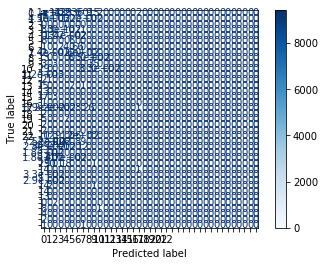

***************************************************************


In [119]:
print("***************************************************************")
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

cm = metrics.confusion_matrix(expected, predicted)
print(cm)
tpr = float(cm[0][0])/np.sum(cm[0])
fpr = float(cm[1][1])/np.sum(cm[1])
print("%.3f" %tpr)
print("%.3f" %fpr)
evaluateCM(cm)
disp = plot_confusion_matrix(model, testdata, expected,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)
plt.show()
print("***************************************************************")




In [116]:
print(cm.diagonal())

[9479 4638  138  141   10   70  732  661   39  359    0    0    0    0
    4    0    0    1    4    0    1    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]


In [110]:
print("***************************************************************")
model = DecisionTreeClassifier()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

cm = metrics.confusion_matrix(expected, predicted)
print(cm)
tpr = float(cm[0][0])/np.sum(cm[0])
fpr = float(cm[1][1])/np.sum(cm[1])
print("%.3f" %tpr)
print("%.3f" %fpr)
evaluateCM(cm)
print("***************************************************************")


***************************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[[9420   21    2 ...    0    0    0]
 [  46 4576    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   3    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
0.970
0.983
Acc: 0.7140259048922001 prec: 0.28478685533858317 recall: 0.23989996702802374 F1: 0.26042337750195743
***************************************************************


In [111]:
print("***************************************************************")
model = AdaBoostClassifier(n_estimators=100)
model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

cm = metrics.confusion_matrix(expected, predicted)
print(cm)
tpr = float(cm[0][0])/np.sum(cm[0])
fpr = float(cm[1][1])/np.sum(cm[1])
print("%.3f" %tpr)
print("%.3f" %fpr)
evaluateCM(cm)

print("***************************************************************")

***************************************************************
[[9413  244    0 ...    0    0    0]
 [  65 4592    0 ...    0    0    0]
 [ 141    0    0 ...    0    0    0]
 ...
 [   4    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]]
0.969
0.986
Acc: 0.6258427963055992 prec: 0.12076631297725295 recall: 0.1312373650809 F1: 0.12578429670389663
***************************************************************


In [112]:
print("***************************************************************")
model = RandomForestClassifier(n_estimators=100)
model = model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
# summarize the fit of the model

cm = metrics.confusion_matrix(expected, predicted)
print(cm)
# tpr = float(cm[0][0])/np.sum(cm[0])
# fpr = float(cm[1][1])/np.sum(cm[1])
evaluateCM(cm)

print("***************************************************************")

***************************************************************
[[9479    5    0 ...    0    0    0]
 [  17 4638    0 ...    0    0    0]
 [   1    0  138 ...    0    0    0]
 ...
 [   3    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
Acc: 0.7220102909820592 prec: 0.29877976623879876 recall: 0.28565542543435885 F1: 0.2920702327722004
***************************************************************


In [114]:
print(cm.diagonal())

[9479 4638  138  141   10   70  732  661   39  359    0    0    0    0
    4    0    0    1    4    0    1    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]


In [72]:
def evaluateCM(ConfusionMatrix):
    ConfusionMatrix = np.add(ConfusionMatrix, 0.0000000001)
#     print("sum is ", np.sum(ConfusionMatrix))
    accuracy = np.sum(ConfusionMatrix.diagonal()) / np.sum(ConfusionMatrix)
#     print("sum a1 is ", np.sum(ConfusionMatrix, axis = 1))
    precision = ConfusionMatrix.diagonal() / np.sum(ConfusionMatrix, axis = 1)
#     print("sum a0 is ", np.sum(ConfusionMatrix, axis = 0))
    recall = ConfusionMatrix.diagonal() / np.sum(ConfusionMatrix, axis = 0)

    precision = np.mean(precision)
    recall = np.mean(recall)
    F1 = 2* ((precision * recall ) / (precision + recall))

    print("Acc:", accuracy, "prec:", precision, "recall:", recall, "F1:", F1 )
